# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. EDA](#3)
- [4. Clustring](#4)
    - [4.1 Elbow Plot](#4.1)
    - [4.2 Plotting all the Clusters and their Centroids](#4.2)
    - [4.3 Analysis the Clusters](#4.3)
- [5. Data Preprocessing](#5)
- [6. Assigning Feature and target variables](#6)
- [7. Feature Scaling](#7)
- [8. Spliting the data into Training and Testing Data](#8)
- [9. Modeling](#9)
    - [9.1 Logistic Regression](#9.1)
    - [9.2 Random Forest](#9.2)
    - [9.3 KNN](#9.3)
    - [9.4 Bagging](#9.4)
    - [9.5 Gradient Boosting](#9.5)
    - [9.6 Decision Tree](#9.6)
    - [9.7 SVM](#9.7)
- [10. Auto Machine Learning](#10)

<a id='2'></a>
# Import Necssaries Libraries

In [126]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tpot import TPOTClassifier

import warnings
warnings.filterwarnings("ignore")

<a id='3'></a>
# EDA

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [108]:
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns")

Data has 200 rows and 6 columns


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
df.columns[df.isna().any()]

Index([], dtype='object')

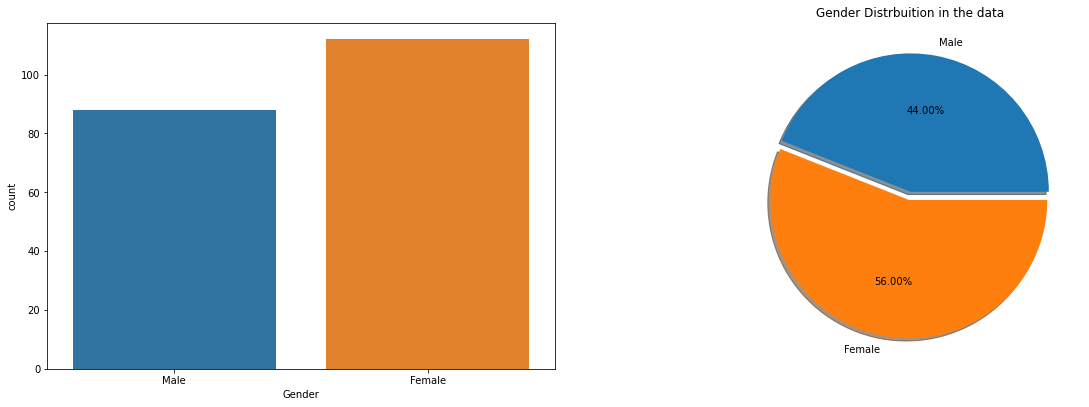

In [8]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='Gender', data=df);

plt.subplot(2,2,2)
male = df.Gender[df.Gender == 'Male'].count()
female = df.Gender[df.Gender == 'Female'].count()
plt.title("Gender Distrbuition in the data")
plt.pie([male, female], labels=['Male', 'Female'], autopct='%.2f%%', explode=[0.03,0.03], shadow=True)
plt.show()

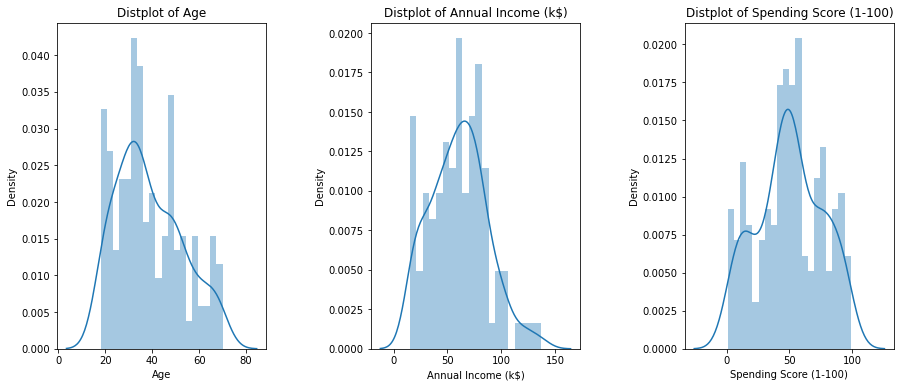

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
data = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for x in data:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Distrbution of Age, Annaul Income and Spending Score<br>
those features as they have a little skeweenes and kurtosis are tends to be normally distrbuted 

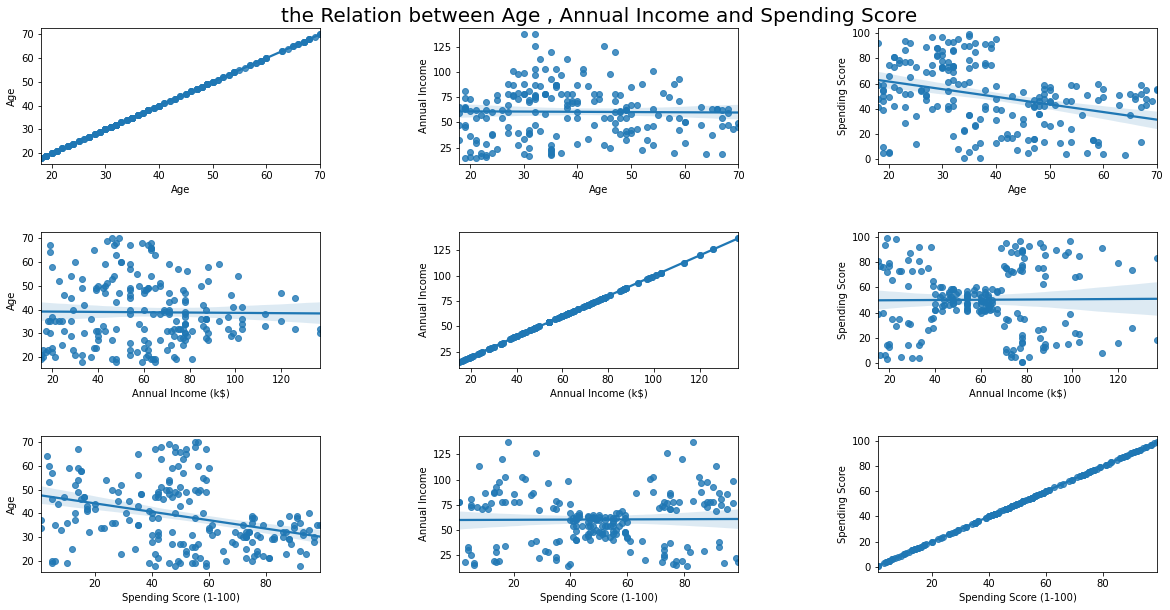

In [10]:
plt.figure(1 , figsize = (20 , 10))
n = 0 
data=['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for x in data:
    for y in data:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
        plt.title('the Relation between Age , Annual Income and Spending Score' if n==2 else '',{'fontsize':20})
plt.show()

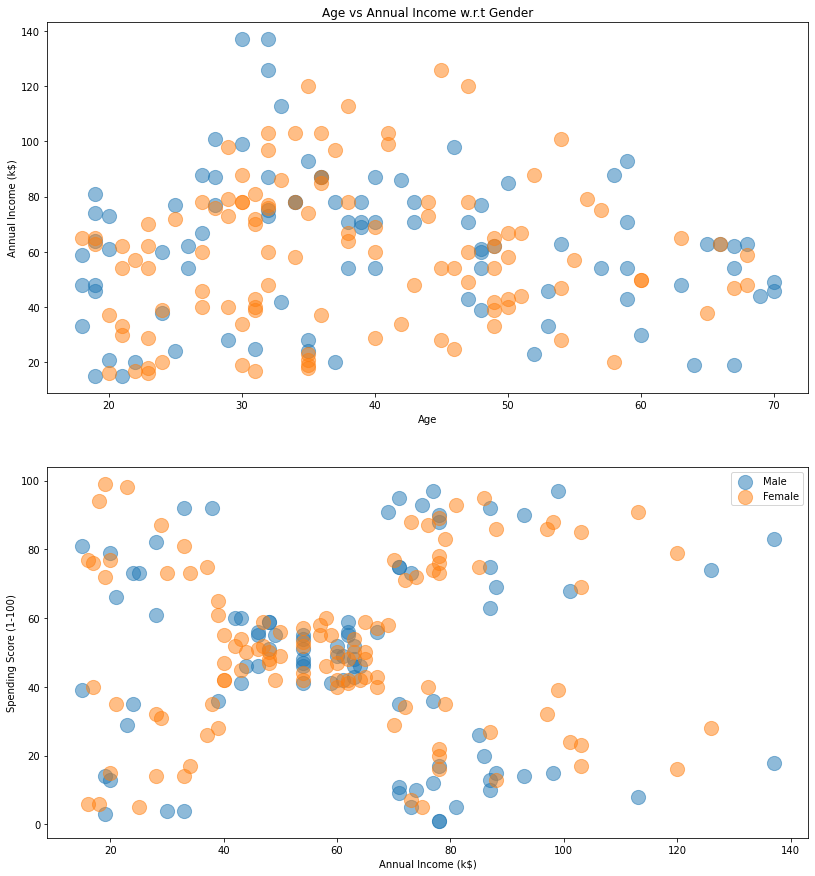

In [11]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')

plt.subplot(2,2,3)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 

plt.legend()
plt.show()
plt.show()

there is no clear relation

Text(0.5, 1.0, 'Age vs Spending Score w.r.t Gender')

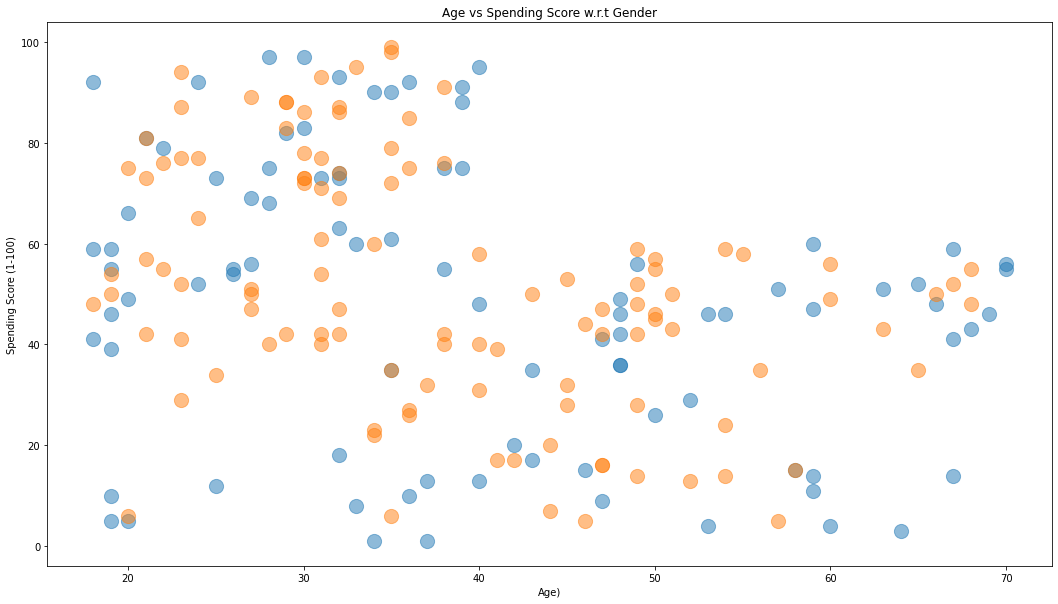

In [12]:
plt.figure(figsize=(18,10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score w.r.t Gender')

when Age is low the spending score tend to increase

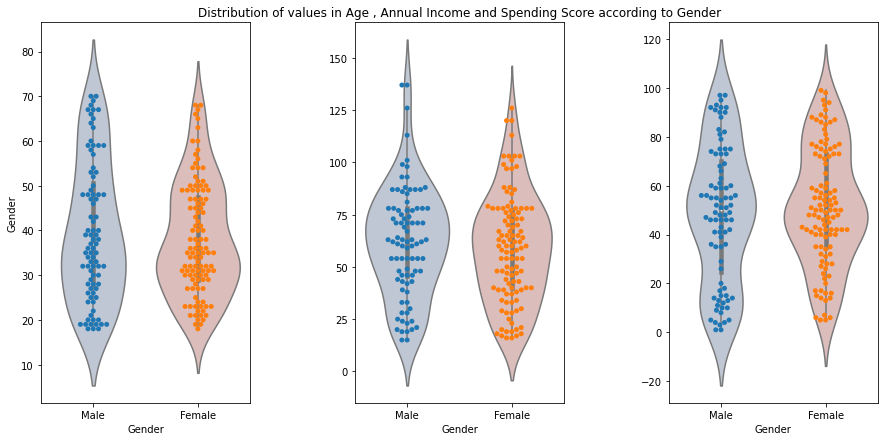

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = 'Gender' , y = cols , data = df , palette = 'vlag')
    sns.swarmplot(x = 'Gender' , y = cols , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Distribution of values in Age , Annual Income and Spending Score according to Gender' if n == 2 else '')
plt.show()

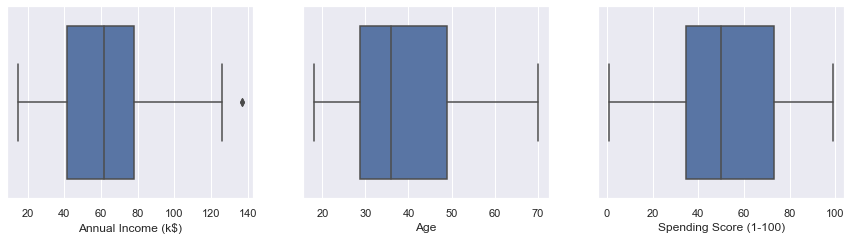

In [35]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.boxplot(x='Annual Income (k$)', data=df)

plt.subplot(3,3,2)
sns.boxplot(x='Age', data=df)

plt.subplot(3,3,3)
sns.boxplot(x='Spending Score (1-100)', data=df);

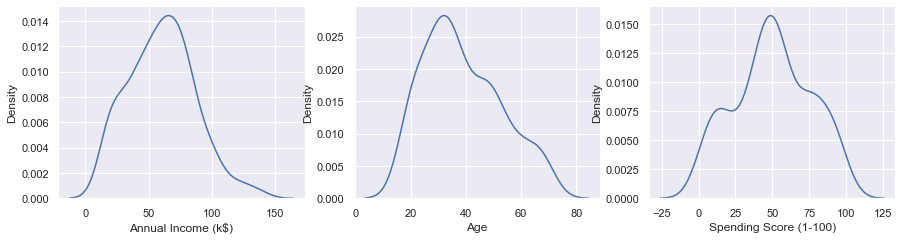

In [36]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.kdeplot(x='Annual Income (k$)', data=df)

plt.subplot(3,3,2)
sns.kdeplot(x='Age', data=df)

plt.subplot(3,3,3)
sns.kdeplot(x='Spending Score (1-100)', data=df);

<a id='4'></a>
# Clustring

In [15]:
X = df.iloc[:,[3,4]].values

In [16]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

<a id='4.1'></a>
## Elbow Plot

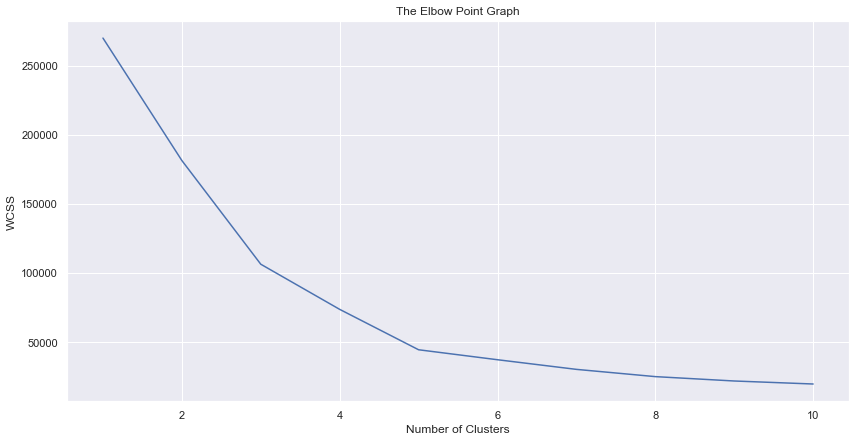

In [17]:
plt.figure(figsize=(14,7))
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


<a id='4.2'></a>
## Plotting all the Clusters and their Centroids

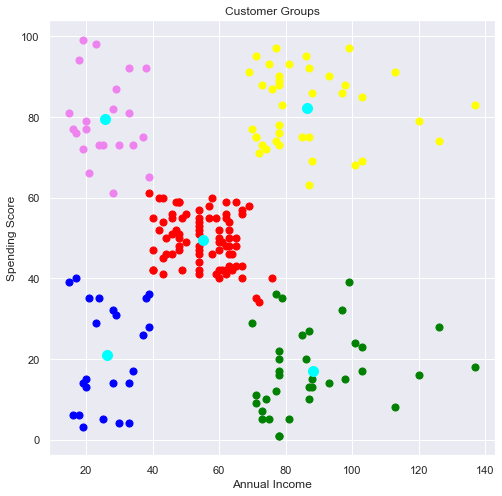

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

<a id='4.3'></a>
## Analysis the Clusters

In [20]:
df['target'] = Y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


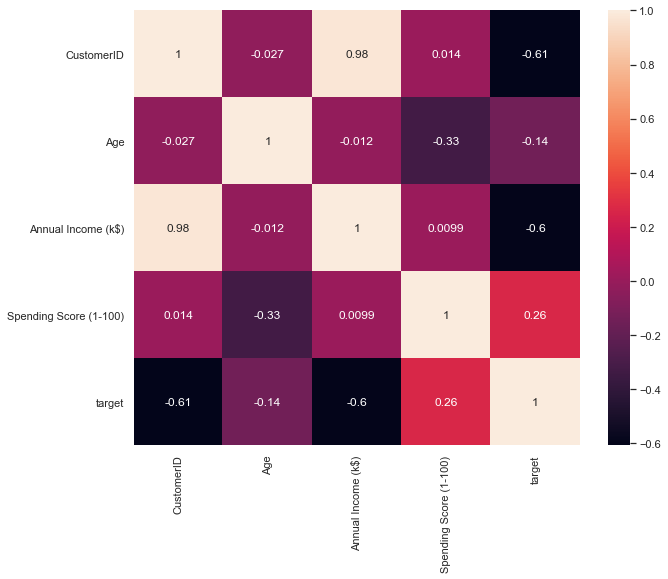

In [121]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

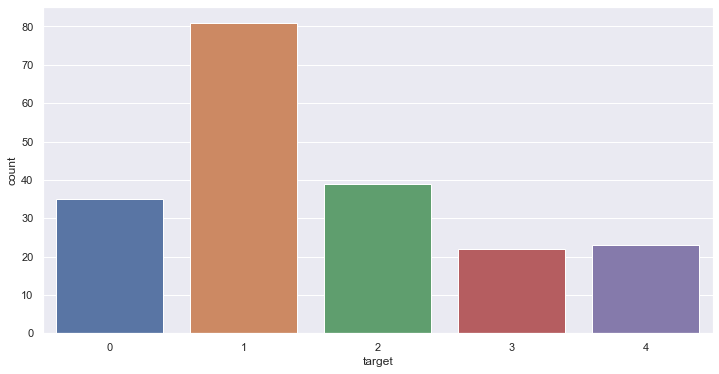

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='target', data=df);

<AxesSubplot:xlabel='Gender', ylabel='count'>

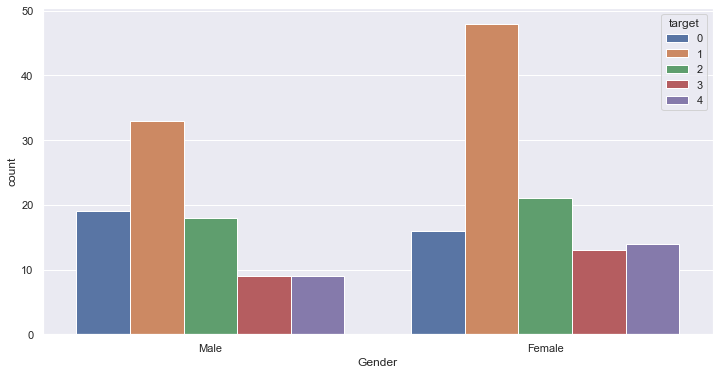

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender', hue='target', data=df)

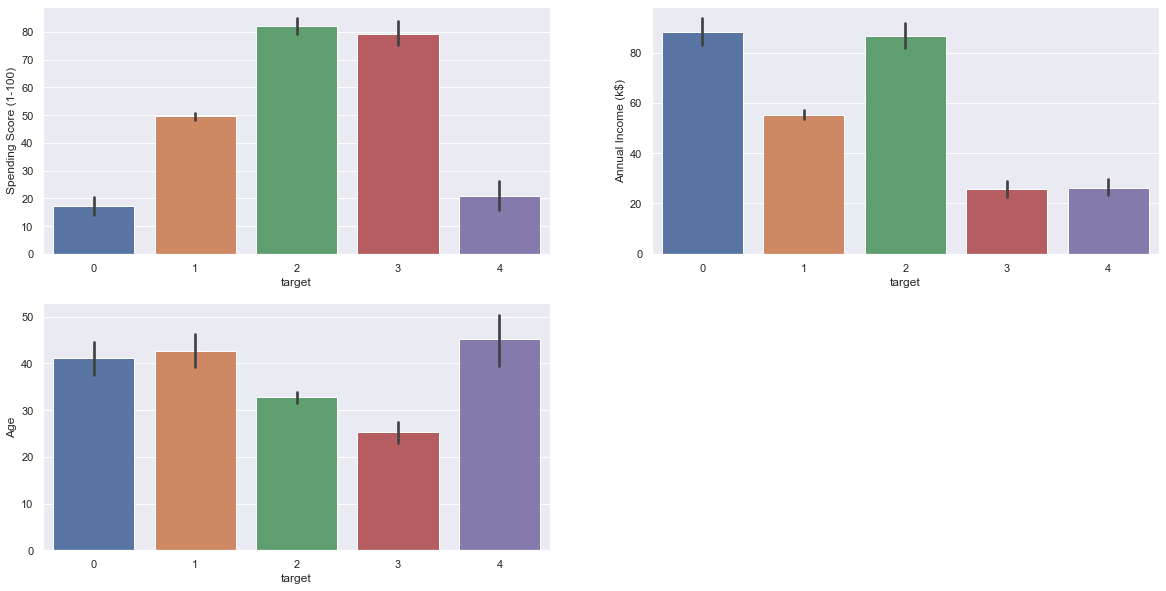

In [23]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(x='target',y='Spending Score (1-100)', data=df)

plt.subplot(2,2,2)
sns.barplot(x='target',y='Annual Income (k$)', data=df);

plt.subplot(2,2,3)
sns.barplot(x='target',y='Age', data=df);

**Cluster 0 contains clients with a high salary and low Spending Score and Average age 40**<br>
**Cluster 1 contains clients with an average salary and average Spending Score and Average age 43**<br>
**Cluster 2 contains clients with a high salary and high Spending Score and Average age 32**<br>
**Cluster 3 contains clients with a low salary and high Spending Score and Average age 25**<br>
**Cluster 4 contains clients with a low salary and low Spending Score and Average age 45**<br>

<a id='5'></a>
# Data Preprocessing

In [40]:
df2 = df.copy()

**Label Encoder**

In [41]:
encoding = LabelEncoder()
df2['Gender'] = encoding.fit_transform(df2['Gender'])

In [42]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [44]:
df2.drop("CustomerID", axis=1, inplace=True)

In [45]:
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


<a id='6'></a>
# Assign Feature and target Variables

In [48]:
X = df2.drop("target", axis=1)
y = df2.target

In [49]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<a id='7'></a>
# Feature Scaling

In [75]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

<a id='8'></a>
# Split the data into Training and Testing data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size=0.25, random_state=20)

In [89]:
print(f"Number of Training dataset: {len(X_train)}\nNumber of Testing dataset: {len(X_test)}")

Number of Training dataset: 150
Number of Testing dataset: 50


<a id='9'></a>
# Modeling

In [127]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True);
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def roc(model):
    y_binarize = label_binarize(y, classes=[0,1,2,3,4])
    y_binarize.shape
    n_classes = y_binarize.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X,y_binarize, test_size=0.25, random_state=150)
    classifier = OneVsRestClassifier(
    model)
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure(figsize=(10,7))
    lw = 2
    plt.plot(
        fpr[2],
        tpr[2],
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[2],
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

<a id='9.1'></a>
## Logistic Regression

In [128]:
lr = LogisticRegression()
kfolds(lr, "Logistic Regression")
train(lr, "Logistic Regression")

Logistic Regression score on cross validation: 83.0%
Logistic Regression model score on Training data: 96.0%
Logistic Regression model score on Testing data: 100.0%


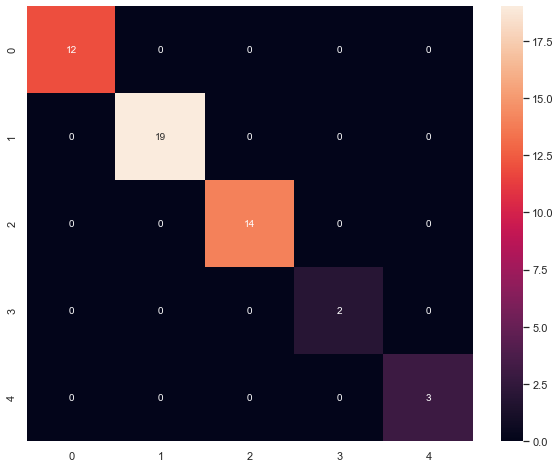

In [129]:
conf_matrix(lr)

In [130]:
class_report(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



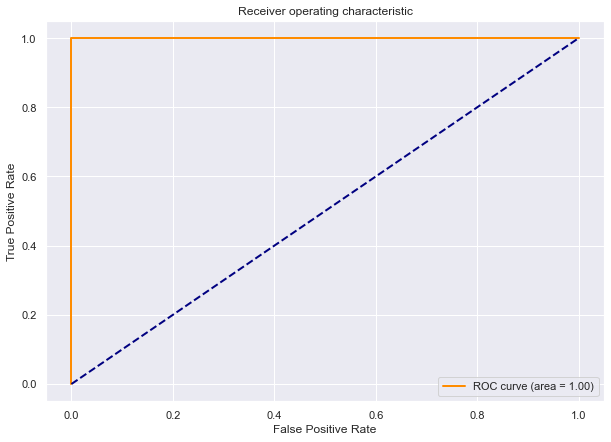

In [131]:
roc(lr)

<a id='9.2'></a>
## Random Forest

In [93]:
rf = RandomForestClassifier()
kfolds(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 90.5%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 98.0%


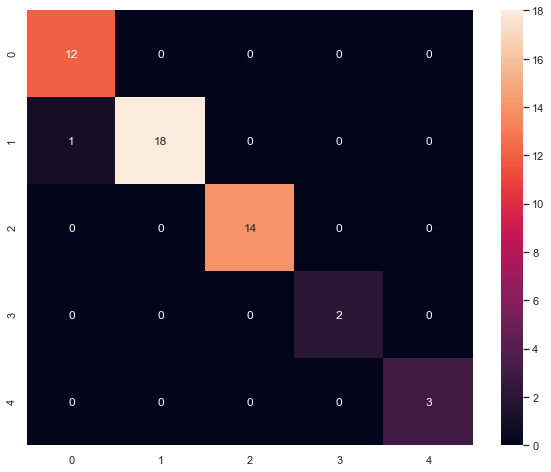

In [109]:
conf_matrix(rf)

In [110]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



<a id='9.3'></a>
## KNN

In [94]:
knn = KNeighborsClassifier()
kfolds(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 96.0%
KNN model score on Training data: 96.0%
KNN model score on Testing data: 100.0%


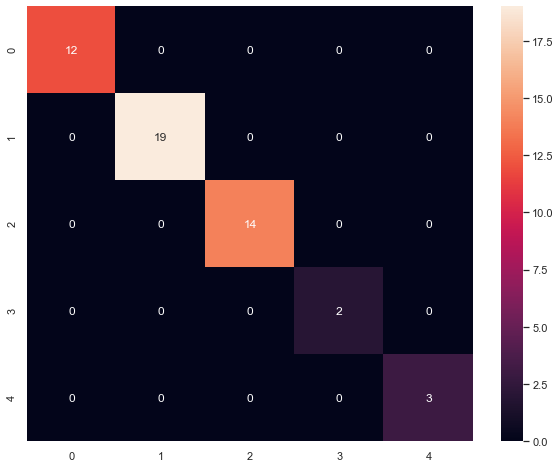

In [111]:
conf_matrix(knn)

In [112]:
class_report(knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



<a id='9.4'></a>
## Bagging

In [95]:
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 82.0%
Bagging model score on Training data: 99.33333333333333%
Bagging model score on Testing data: 100.0%


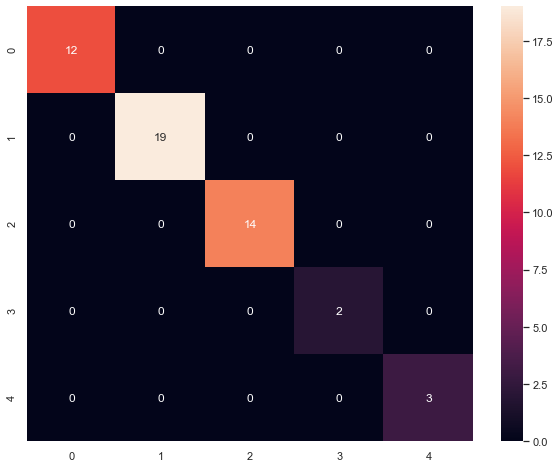

In [113]:
conf_matrix(bagg_model)

In [114]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



<a id='9.5'></a>
## Gradient Boosting

In [96]:
gb_model = GradientBoostingClassifier(n_estimators=50)
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 82.5%
Boosting model score on Training data: 100.0%
Boosting model score on Testing data: 96.0%


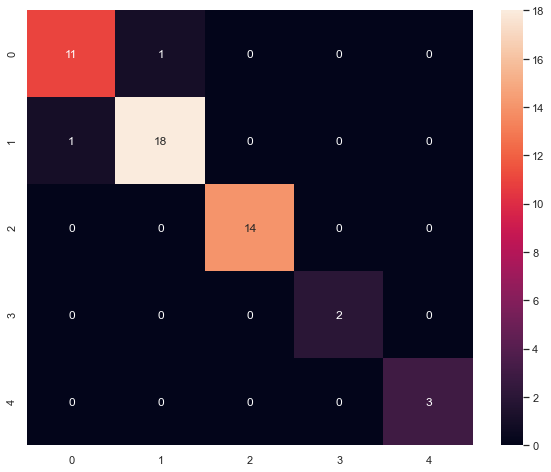

In [115]:
conf_matrix(gb_model)

In [116]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           0.96        50
   macro avg       0.97      0.97      0.97        50
weighted avg       0.96      0.96      0.96        50



<a id='9.6'></a>
## Decision Tree

In [97]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 78.49999999999999%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 98.0%


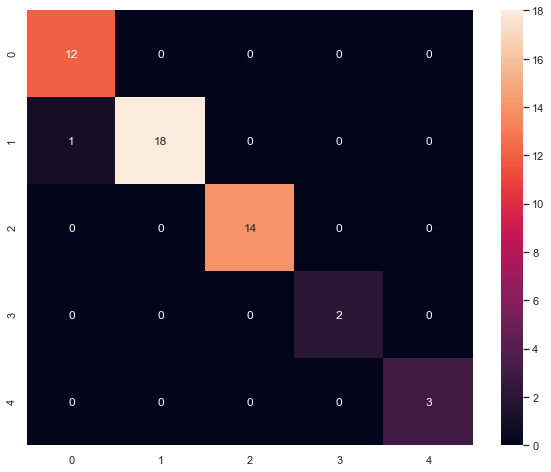

In [117]:
conf_matrix(dt_model)

In [118]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



## SVM

In [99]:
svm_model = SVC(kernel='linear')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 94.0%
SVM model score on Training data: 99.33333333333333%
SVM model score on Testing data: 100.0%


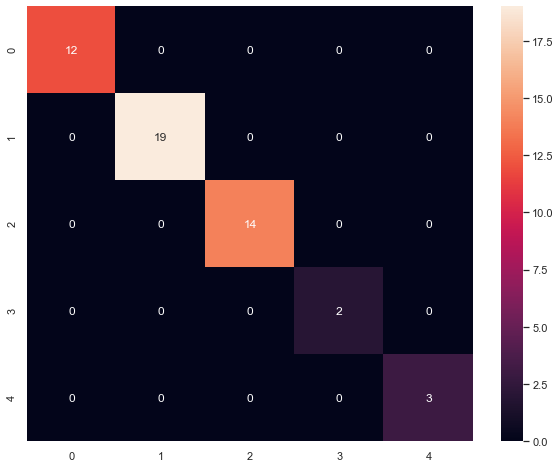

In [119]:
conf_matrix(svm_model)

In [120]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



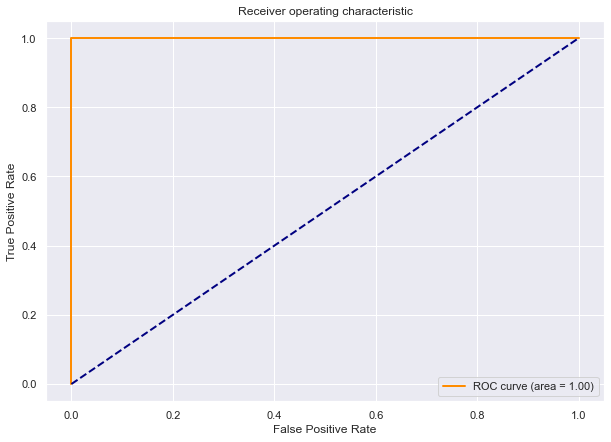

In [133]:
roc(svm_model)

# Auto Machine Learning

In [107]:
tpot_model = TPOTClassifier(generations=5, population_size=200, cv=5,
                                    random_state=42, verbosity=2, scoring='accuracy')
train(tpot_model, "Automated Machine Learning")

Optimization Progress:   0%|          | 0/1200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9866666666666667

Generation 2 - Current best internal CV score: 0.9866666666666667

Generation 3 - Current best internal CV score: 0.9866666666666667

Generation 4 - Current best internal CV score: 0.9933333333333334

Generation 5 - Current best internal CV score: 0.9933333333333334

Best pipeline: GradientBoostingClassifier(KNeighborsClassifier(GaussianNB(ZeroCount(input_matrix)), n_neighbors=23, p=2, weights=uniform), learning_rate=0.1, max_depth=9, max_features=0.8500000000000001, min_samples_leaf=10, min_samples_split=7, n_estimators=100, subsample=0.7000000000000001)
Automated Machine Learning model score on Training data: 100.0%
Automated Machine Learning model score on Testing data: 98.0%


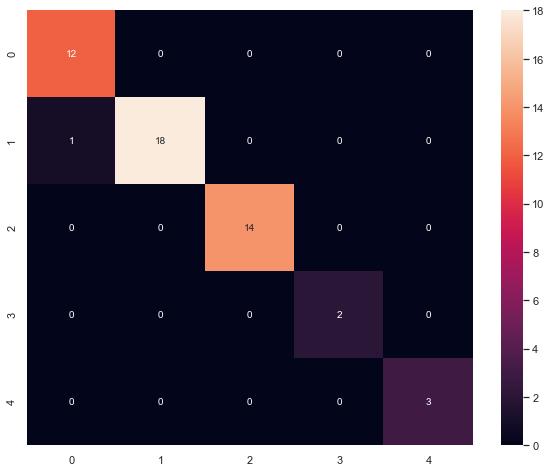

In [134]:
conf_matrix(tpot_model)

In [135]:
class_report(tpot_model)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50

